In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/Excel2.xlsx")

In [2]:
df.shape

(125, 48)

In [3]:
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

Rank in 2020                                      48
Students per Staff                                47
Rank in 2019                                      46
Rank in 2021                                      38
Research Quality                                  38
International course experience rank 2022-2021    38
International work mobility rank 2022-2021        38
Value for money rank 2022-2021                    38
2020.Overall satisfaction                         35
2020.International board (%)                      35
2020.International students (%)                   35
2020.Average course length (months)               35
2020.Extra languages                              35
2020.International mobility rank                  35
2020.International faculty (%)                    35
2020.Weighted salary (US$)                        35
2020.Faculty with doctorates (%)                  35
Faculty Change                                    30
Satisfaction Change                           

In [4]:
df['2020.International board (%)'].fillna(0, inplace=True)
df['2020.International board (%)'].replace('0 ††', 0, inplace=True)
df['2020.International board (%)'] = df['2020.International board (%)'].astype(int)

In [5]:
df.drop("Rank in 2020", inplace=True, axis=1)
df.drop("Rank in 2019", inplace=True, axis=1)

In [6]:
df.drop("School Name", inplace=True, axis=1)

In [7]:
df.shape 

(125, 45)

In [8]:
df.describe()

,LinkedIn Followers,Instagram engagement %,Research Quality,Citations per Faculty,Average Experience of Faculty,Students per Staff,2020.Faculty with doctorates (%),2020.Weighted salary (US$),2020.International faculty (%),2020.International mobility rank,...,International work mobility rank 2022-2021,Value for money rank 2022-2021,Careers service Rank Stability,International course experience Rank Stability,International work mobility Rank Stability,Career progress Rank Stability,Value for money Rank Stability,Faculty Change,Satisfaction Change,Value for Money Index
count,123.000000,110.000000,87.000000,102.000000,110.000000,78.000000,90.000000,90.000000,90.000000,90.000000,...,87.000000,87.000000,98.000000,98.000000,98.000000,98.000000,98.000000,95.000000,95.000000,100.000000
mean,81279.219512,2.137545,79.494253,39.998039,11.381818,18.479487,94.322222,74124.577778,42.844444,45.500000,...,-0.367816,0.988506,0.247259,0.203163,0.191558,0.278777,0.120844,-0.205263,-0.018316,0.000693
std,83512.522338,1.465509,13.354246,24.936664,2.076438,8.601727,6.593882,20049.438816,24.186964,26.124701,...,9.866687,5.614546,0.189132,0.218254,0.173769,0.230616,0.112362,1.933048,0.212325,0.000460
min,39.000000,0.110000,24.100000,3.500000,8.000000,10.500000,68.000000,47151.000000,0.000000,1.000000,...,-24.000000,-19.000000,0.000000,0.000000,0.000000,0.010323,0.000000,-7.500000,-0.520000,0.000012
25%,24467.000000,1.200000,79.150000,22.000000,10.000000,14.175000,91.250000,59108.750000,24.000000,23.250000,...,-5.000000,-1.000000,0.113160,0.065066,0.064359,0.103511,0.046526,-1.000000,-0.165000,0.000323
50%,47436.000000,1.535000,81.400000,25.000000,10.000000,15.050000,96.500000,68832.000000,45.000000,45.500000,...,-1.000000,1.000000,0.203678,0.124208,0.144711,0.218129,0.080246,0.000000,-0.030000,0.000663
75%,114688.500000,3.115000,85.000000,57.450000,14.000000,16.950000,100.000000,84490.500000,58.750000,67.750000,...,2.500000,3.000000,0.338635,0.246988,0.257707,0.419767,0.156947,0.000000,0.100000,0.000992
max,536866.000000,9.070000,96.900000,100.000000,16.000000,57.100000,100.000000,141759.000000,96.000000,90.000000,...,39.000000,21.000000,0.783735,0.960506,0.826136,1.219150,0.622700,7.000000,0.640000,0.002311


In [9]:
corr_matrix =df.select_dtypes(include=['number']).corr()

# Get highly correlated pairs
highly_correlated = (corr_matrix.stack().sort_values(ascending=False)
                     .reset_index()
                     .rename(columns={0: 'correlation'}))
highly_correlated = highly_correlated[highly_correlated['correlation'] < 1.0]

# You can set a threshold to define what you consider as "highly correlated"
threshold = 0.7  
highly_correlated = highly_correlated[highly_correlated['correlation'] > threshold]

# Print or further analyze the highly correlated pairs
print(highly_correlated)

                                level_0                              level_1  \
45       2020.International faculty (%)       2021.International faculty (%)   
46       2021.International faculty (%)       2020.International faculty (%)   
47  2020.Average course length (months)  2022.Average course length (months)   
48  2022.Average course length (months)  2020.Average course length (months)   
49           2020.Weighted salary (US$)           2022.Weighted salary (US$)   
50           2022.Weighted salary (US$)           2020.Weighted salary (US$)   
51     2021.International mobility rank     2020.International mobility rank   
52     2020.International mobility rank     2021.International mobility rank   
53     2020.Faculty with doctorates (%)     2022.Faculty with doctorates (%)   
54     2022.Faculty with doctorates (%)     2020.Faculty with doctorates (%)   
55              2021.Women on board (%)              2022.Women on board (%)   
56              2022.Women on board (%) 

In [10]:
corr_matrix =df.select_dtypes(include=['number']).corr()

# Get highly correlated pairs
highly_correlated = (corr_matrix.stack().sort_values(ascending=False)
                     .reset_index()
                     .rename(columns={0: 'correlation'}))
highly_correlated = highly_correlated[highly_correlated['correlation'] < 1.0]

# You can set a threshold to define what you consider as "highly correlated"
threshold = -0.7  
highly_correlated = highly_correlated[highly_correlated['correlation'] < threshold]

# Print or further analyze the highly correlated pairs
print(highly_correlated)

Empty DataFrame
Columns: [level_0, level_1, correlation]
Index: []


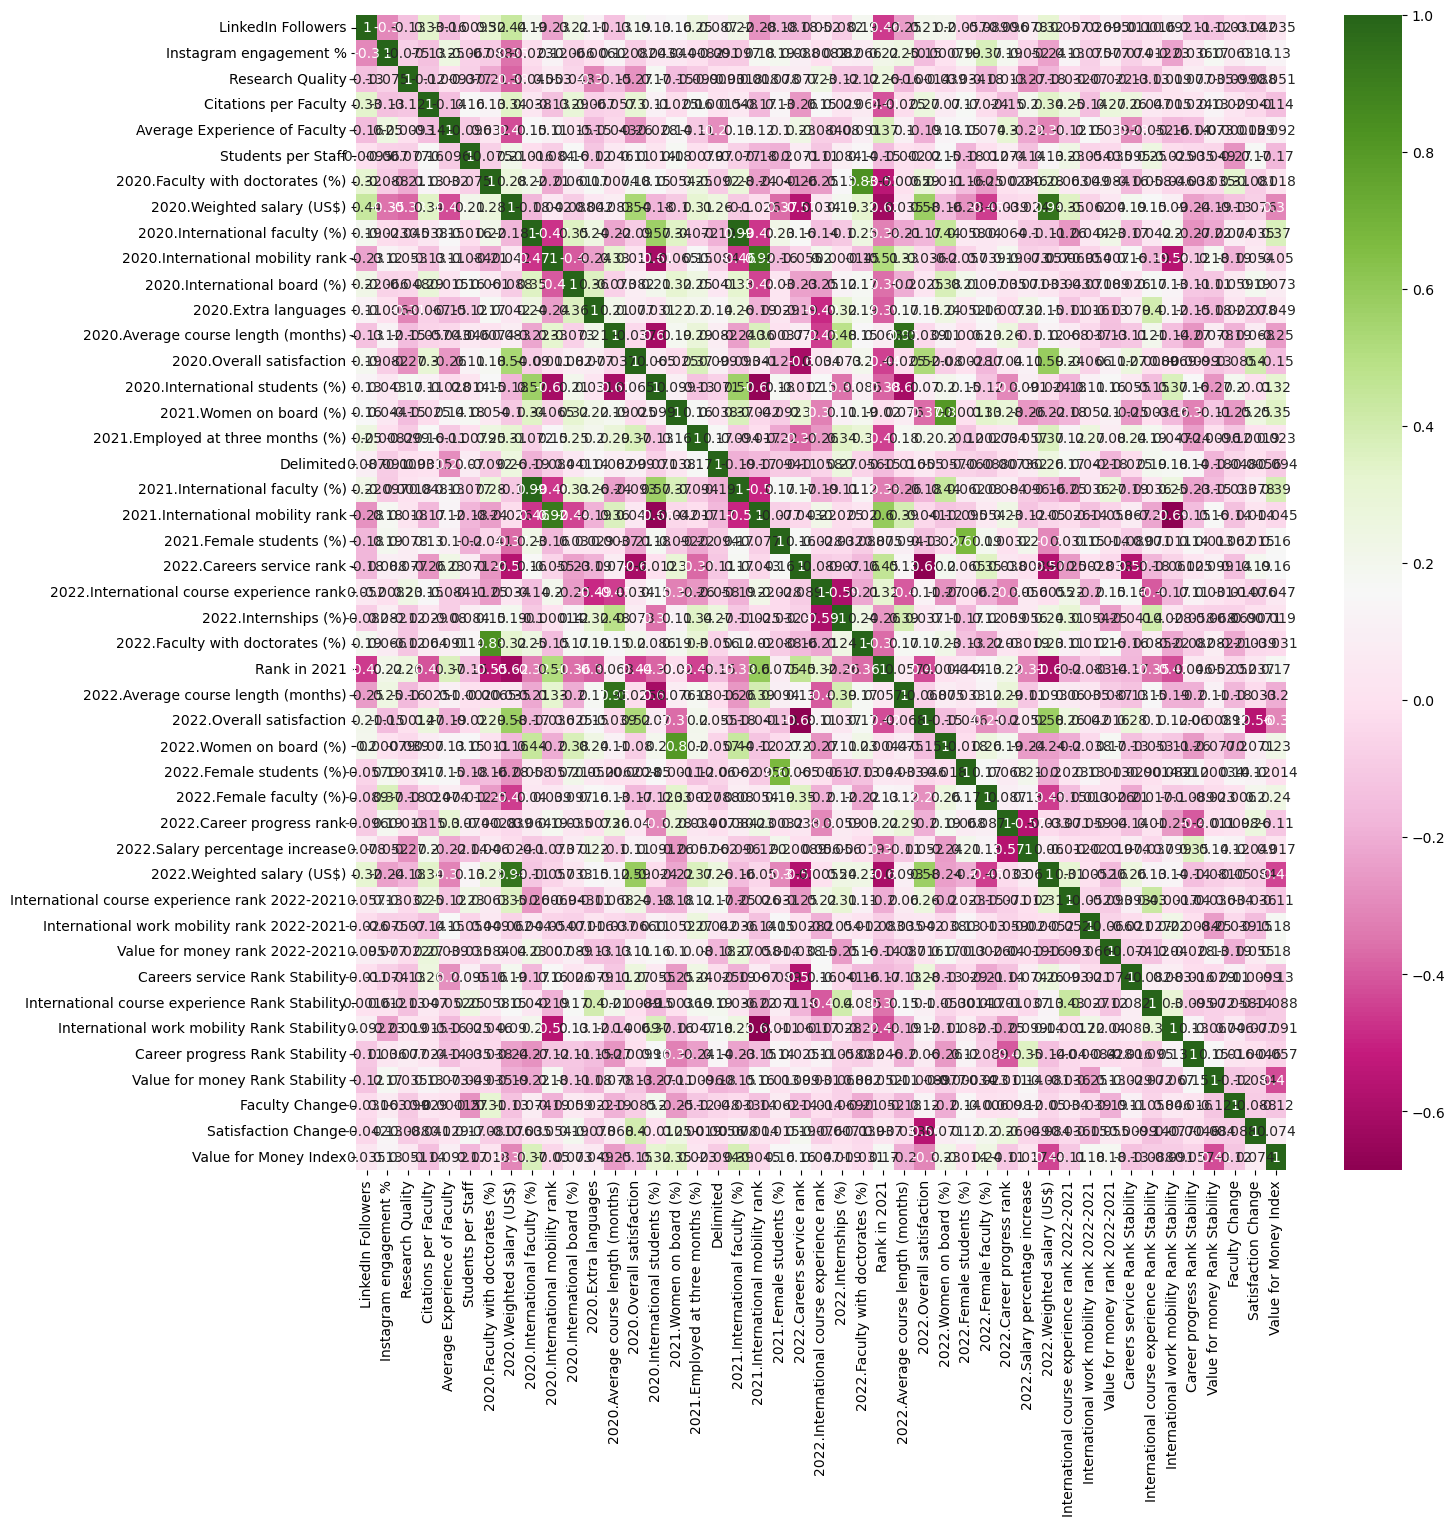

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create a correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PiYG')
plt.show()

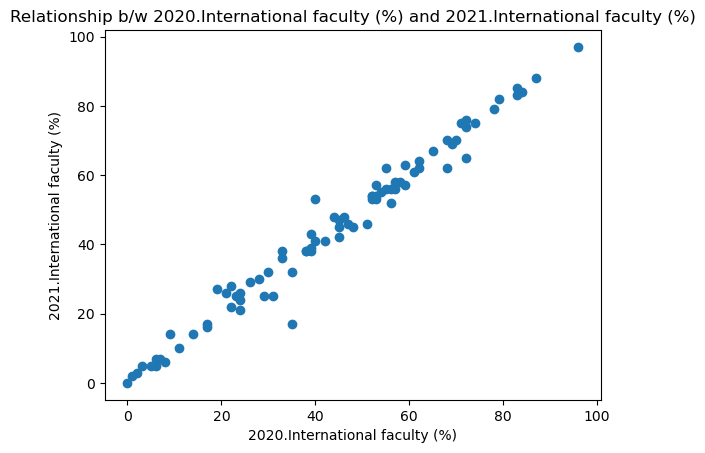

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['2020.International faculty (%)'],df['2021.International faculty (%)'])
plt.xlabel('2020.International faculty (%)')
plt.ylabel('2021.International faculty (%)')
plt.title('Relationship b/w 2020.International faculty (%) and 2021.International faculty (%)')
plt.show()

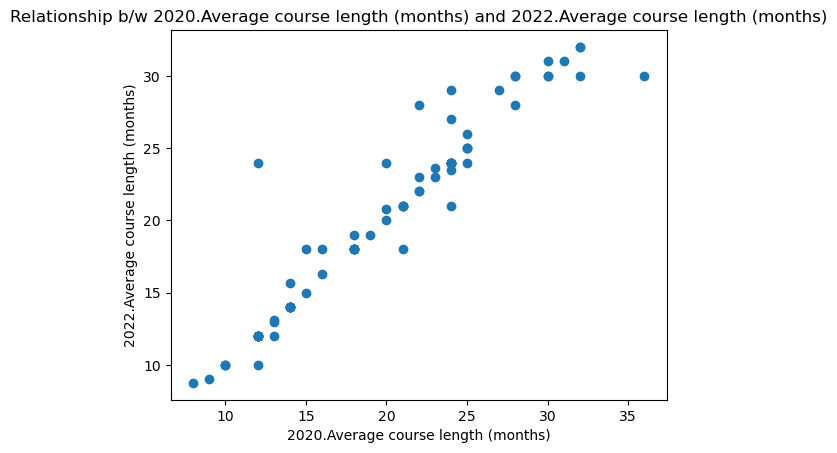

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['2020.Average course length (months)'],df['2022.Average course length (months)'])
plt.xlabel('2020.Average course length (months)')
plt.ylabel('2022.Average course length (months)')
plt.title('Relationship b/w 2020.Average course length (months) and 2022.Average course length (months)')
plt.show()

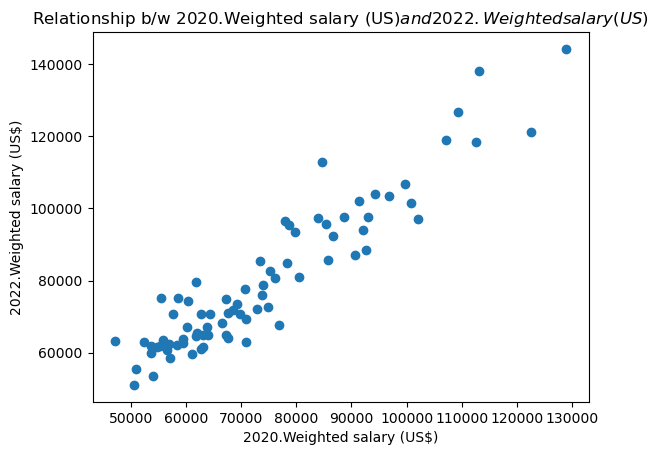

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['2020.Weighted salary (US$)'],df['2022.Weighted salary (US$)'])
plt.xlabel('2020.Weighted salary (US$)')
plt.ylabel('2022.Weighted salary (US$)')
plt.title('Relationship b/w 2020.Weighted salary (US$) and 2022.Weighted salary (US$)')
plt.show()

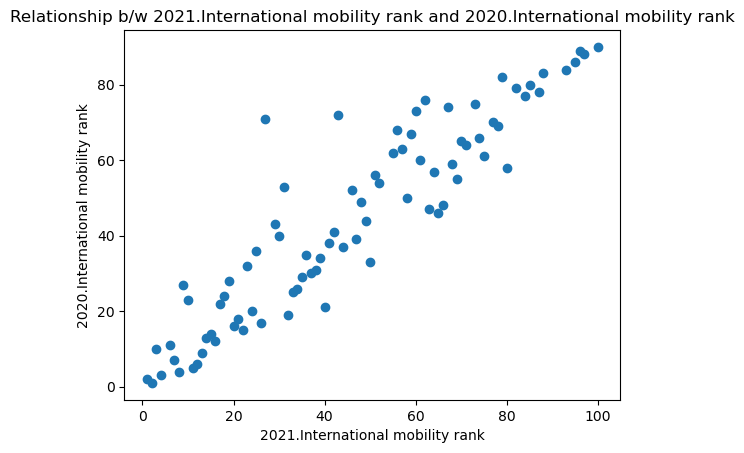

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['2021.International mobility rank'],df['2020.International mobility rank'])
plt.xlabel('2021.International mobility rank')
plt.ylabel('2020.International mobility rank')
plt.title('Relationship b/w 2021.International mobility rank and 2020.International mobility rank')
plt.show()

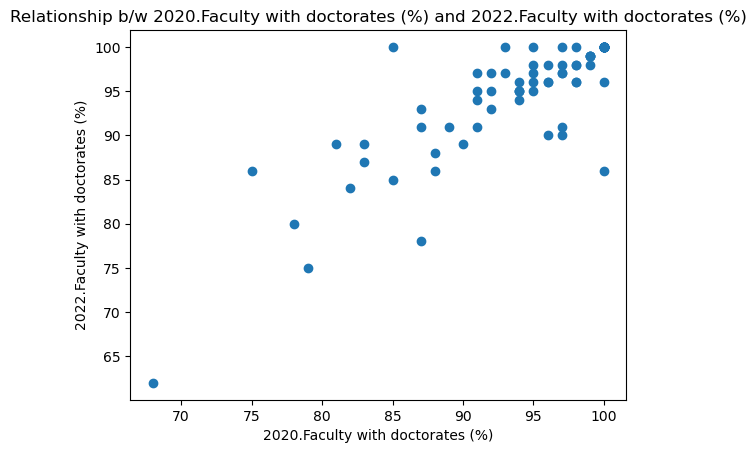

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['2020.Faculty with doctorates (%)'],df['2022.Faculty with doctorates (%)'])
plt.xlabel('2020.Faculty with doctorates (%)')
plt.ylabel('2022.Faculty with doctorates (%)')
plt.title('Relationship b/w 2020.Faculty with doctorates (%) and 2022.Faculty with doctorates (%)')
plt.show()

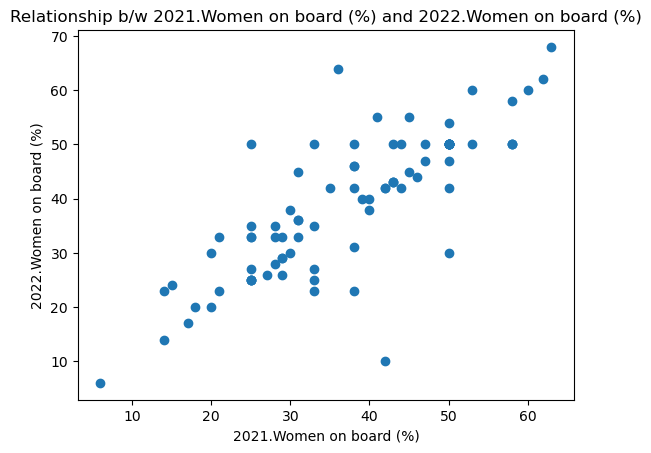

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['2021.Women on board (%)'],df['2022.Women on board (%)'])
plt.xlabel('2021.Women on board (%)')
plt.ylabel('2022.Women on board (%)')
plt.title('Relationship b/w 2021.Women on board (%) and 2022.Women on board (%)')
plt.show()

In [18]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\gupta\anaconda3\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\gupta\anaconda3\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
